In [105]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [106]:
name = "money"

In [107]:
base_img = plt.imread(f"public/assets/original/{name}.png")
base_img.shape

(256, 256, 4)

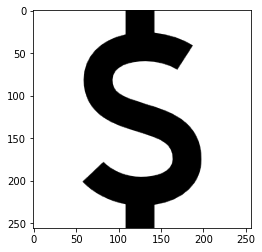

In [108]:
plt.imshow(base_img)

In [109]:
def sharpen(color, v):
    idx = np.argmax(color)
    color = color.copy()
    color[idx] += 2 * v
    color -= v
    return color

def color_name(c):
    return f"{c[0]}-{c[1]}-{c[2]}"

In [110]:
original_colors = [
    (255, 255, 255),
    (250, 100, 100),
    (100, 250, 100),
    (100, 100, 250),
    (200, 200, 100),
    (100, 200, 200),
    (200, 100, 200),
]

colors = []
for color in original_colors:
    color = np.array(color)
    if np.any(color != (255,255,255)):
        color = sharpen(color, 10) - 40
    colors.append(color / 255)


In [111]:
def change_color(img, color):
    img = img.copy()
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if np.all(img[x,y, :3] == (0,0,0)):
                img[x,y,:3] = color
    return img


In [112]:
def save_img(name: str, img: np.ndarray, color: str):
    folder = f"public/assets/icons/{color}"
    if not os.path.exists(folder):
        os.makedirs(folder)
    filename = f"{folder}/{name}"
    plt.imsave(filename, img)

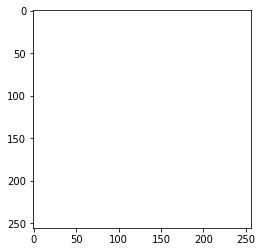

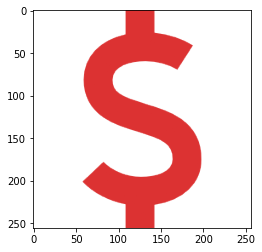

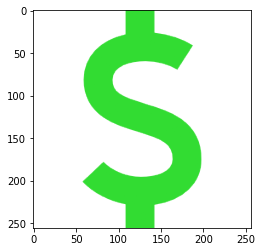

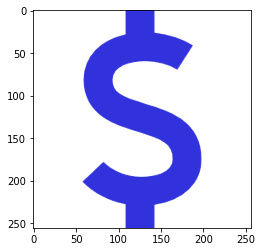

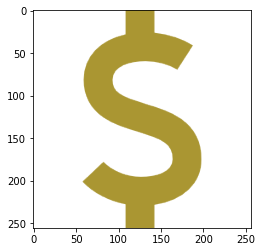

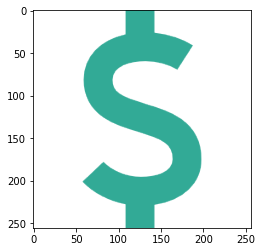

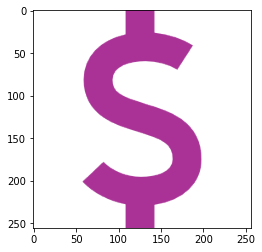

In [113]:
for i, color in enumerate(colors):
    img = change_color(base_img, color)
    folder = color_name(original_colors[i])
    save_img(f"{name}.png", img, folder)
    plt.imshow(img)
    plt.show()